# Movie Industry Analysis

How do we know if a movie will be a blockbuster hit? What are the variables that contribute to this? Director, star actor or budget interfere for a film to achieve success?

In this work, we set out to analyze the IMDB scraped movie dataset to gain insights and answer all our curiosity.

The dataset is from Kaggle - <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies"> Movie Industry </a> and contains 6820 movies in the dataset (220 movies per year, 1986-2016), including information on popularity, revenue, budget, cast, and genres.


## Table of Contents 


- Asking Questions
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

***
## Asking Questions


Based on dataset, we are interested to know:

- Q1: Does a higher budget results in higher revenue and profit?
- Q2: What is the most profitable genre?
- Q3: Which genres are associated with high popularity?
- Q4: Which director produces the highest gross movies?
- Q5: Which star actor is associated with higher popularity, gross and profit?
- Q6: Which year produced movies with highest grossing revenue?
- Q7: Which company has the most revenue and what is their most profitable film?
- Q8: What are the 3 best rated movies?

***
## Data Wrangling


We will prepare the environment, load and assess dataset. Subsequently, we also clean and process the data for analysis.

### Preparing the Environment


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#read the csv data
df = pd.read_csv('movies.csv')

### Assess Data


In this step, we view the dataset and get basic information.

In [3]:
# Now let's take a look at the first 5 rows

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


We have 7668 rows so we see that we have null values in some columns

### Handle Missing Values


In [5]:
#do we have null?

df.isnull().any().any()

True

In [6]:
# in which columns?

df.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

Using percentage to find missing values would give a clearer representation of the missing values in the dataset.

In [7]:
# Find percentage of null values

df.isnull().sum()/len(df)*100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

We will drop the unnecessary fields 

In [8]:
#remove missing data

df = df.dropna()

In [9]:
# do we still have null values?

df.isnull().any().any()

False

### Handle Duplicates


In [10]:
# Check for duplicates
df.duplicated().sum()


0

In [ ]:
# We don't have duplicate lines, so we don't need to retract anything. If we needed:

# Drop row and set inplace to True to reflect changes in dataset
# df.drop_duplicates(inplace=True)

### Change DataType

Let's look at the column data types and see if we need to change anything.


In [11]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
#change data type of columns (to remove float numbers)

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [13]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

### Create Year Column and Calculated Field


In [14]:
# Some of the year and release date column are inconsistent
# create yearcorret column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)



# Create a column for profit and profit margin

df['profit'] = df['gross'] - df['budget']
df['profit_margin'] = df['profit']/df['gross']*100

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,27998772,59.573412
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,54353106,92.353845
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,520375067,96.656606
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,79953539,95.806050
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,33846344,84.942157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,336505244,78.898266
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,234715683,73.413878
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020,70487753,28.713348
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020,-23894503,-21.506139


### Drop Columns

In [15]:
df.drop(['year'], axis=1, inplace=True)

***
## Exploratory Data Analysis


In [16]:
# Order our Data a little bit to see

df.sort_values(by=['profit_margin'], inplace=False, ascending=False)

#if you want to see all your data
#pd.set_option('display.max_rows',None)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
5114,Paranormal Activity,R,Horror,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009,193340800,9.999224e+01
3459,The Blair Witch Project,R,Horror,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999,248579099,9.997587e+01
6815,The Gallows,R,Horror,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015,42864410,9.976725e+01
2093,El Mariachi,R,Action,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993,2033920,9.965702e+01
5154,Once,R,Drama,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007,20786722,9.928356e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Savior,R,Drama,"November 20, 1998 (United States)",7.3,11000.0,Predrag Antonijevic,Robert Orr,Dennis Quaid,United States,10000000,14328,Initial Entertainment Group (IEG),103.0,1998,-9985672,-6.969341e+04
1898,The Lovers on the Bridge,R,Drama,"July 2, 1999 (United States)",7.6,13000.0,Leos Carax,Leos Carax,Juliette Binoche,France,28000000,29679,Films A2,125.0,1999,-27970321,-9.424280e+04
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,-4997030,-1.682502e+05
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,-4997446,-1.956713e+05


***
## Q1:  Does a higher budget results in higher revenue and profit?

In [17]:
df.describe()

,score,votes,budget,gross,runtime,yearcorrect,profit,profit_margin
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000,5421.000000,5.421000e+03,5.421000e+03
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739,2001.814794,6.722048e+07,-1.221674e+03
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698,10.550774,1.590042e+08,6.607391e+04
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1980.000000,-1.580311e+08,-4.854269e+06
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000,1993.000000,-3.189887e+06,-3.806192e+01
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000,2002.000000,1.385152e+07,4.554424e+01
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000,2011.000000,7.025820e+07,7.273635e+01
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,2020.000000,2.610246e+09,9.999224e+01


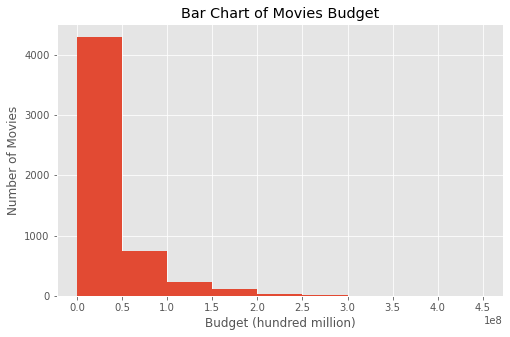

In [18]:
# Budget
x_ticks = np.arange(1.000000e+00,5.000000e+08,5.000000e+07)

df['budget'].hist(bins=x_ticks, figsize=(8,5))
plt.title("Bar Chart of Movies Budget")
plt.xlabel("Budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of Movies");

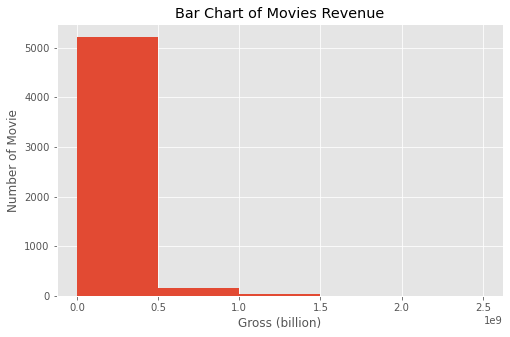

In [19]:
# Gross
x_ticks = np.arange(0.000000e+00,3.000000e+09,5.000000e+08)

df['gross'].hist(bins=x_ticks, figsize=(8,5))
plt.title("Bar Chart of Movies Revenue")
plt.xlabel("Gross (billion)")
plt.xticks(x_ticks)
plt.ylabel("Number of Movie");

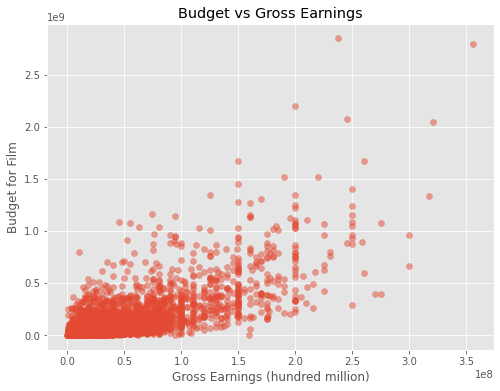

In [58]:
# Plot budget vs Gross using matplotlib

# Scatter plot with budget vs gross
plt.figure(figsize=(8, 6))
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings (hundred million)')
plt.ylabel('Budget for Film')
plt.show()

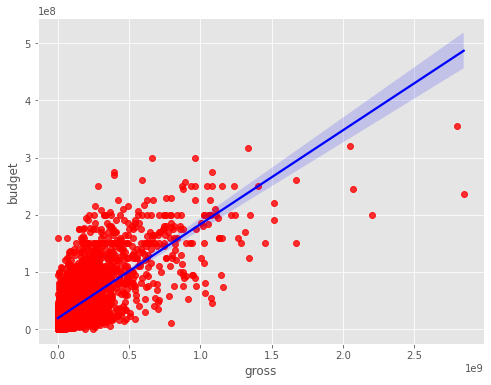

In [21]:
# Plot budget vs gross using seaborn

# regplot: Plot data and a linear regression model fit.

a = sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
a.figure.set_size_inches(8, 6)


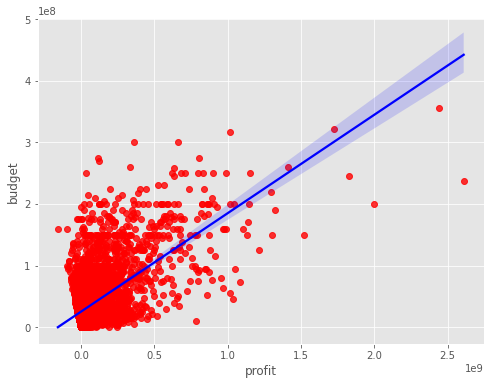

In [22]:
# Plot budget vs Profit using seaborn
# regplot: Plot data and a linear regression model fit.

b = sns.regplot(x="profit", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
b.figure.set_size_inches(8, 6)


### In general, movies with a higher budget results in a higher profit.

Lets look at correlation (only work at numeric fields)

Correlation is a bivariate analysis that measures the strength of association between two variables and the direction 
of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient 
varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.
As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker


In [23]:
#Pearson correlation by default 
df.corr()

,score,votes,budget,gross,runtime,yearcorrect,profit,profit_margin
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923,0.243340,0.012515
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098,0.609203,0.011096
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312,0.610530,0.009937
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721,0.984428,0.010735
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294,0.241554,0.018810
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,0.232797,0.008001
profit,0.243340,0.609203,0.610530,0.984428,0.241554,0.232797,1.000000,0.010048
profit_margin,0.012515,0.011096,0.009937,0.010735,0.018810,0.008001,0.010048,1.000000


#### WE confirm that we have high correlation between budget and gross 0.740247 
#### And between budget and profit 0.610530



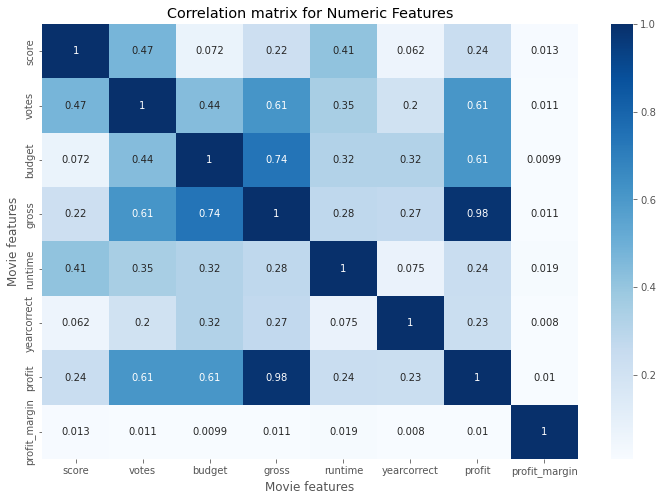

In [24]:
#lets visualize the heatmap for the pearson correlation

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True,  cmap="Blues")

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
#Let us find out the top 10 movies with highest budget.

# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies

#df[["name","budget"]].sort_values('budget', ascending = False)[:10]

blockbuster_grouped = df.groupby('name')[['budget','gross','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

,budget,gross,profit
name,,,
Avengers: Endgame,356000000,2797501328,2441501328
Avengers: Infinity War,321000000,2048359754,1727359754
Star Wars: Episode VIII - The Last Jedi,317000000,1332698830,1015698830
The Lion King,305000000,2754448457,2449448457
Robin Hood,300000000,408162787,108162787
Justice League,300000000,657926987,357926987
Pirates of the Caribbean: at World's End,300000000,960996492,660996492
Godzilla,290000000,903990363,613990363
The Avengers,280000000,1542200454,1262200454


***
## Q2:  What is the most profitable genre?

In [26]:
#First let's see the number of movies of each genre in the table

df['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

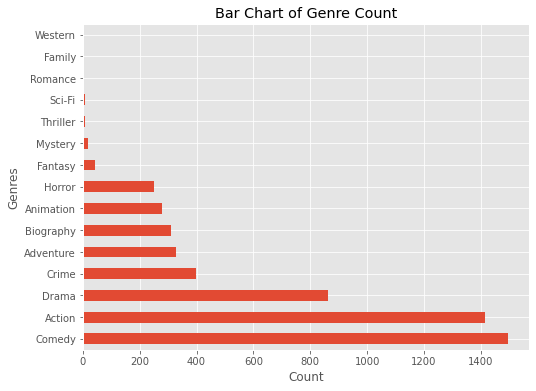

In [27]:
plt.figure(figsize=[8,6])
df['genre'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count")
plt.ylabel("Genres")
plt.xlabel("Count");

### The highest genre count is Comedy, Action and Drama. Does that mean they are more profitable?


With such unequal values of numbers of genres, let's use the average to observe the profitability of each one

In [28]:
df['profit'].describe()

count    5.421000e+03
mean     6.722048e+07
std      1.590042e+08
min     -1.580311e+08
25%     -3.189887e+06
50%      1.385152e+07
75%      7.025820e+07
max      2.610246e+09
Name: profit, dtype: float64

In [29]:
df['profit'].mean()

67220482.86312489

In [30]:
genre_mean = df.groupby('genre')[['gross','profit']].mean().sort_values('profit',ascending=False)
genre_mean.query("profit > 67220482.86312489")

,gross,profit
genre,,
Family,5.185831e+08,4.674581e+08
Animation,2.811044e+08,2.047810e+08
Action,1.680232e+08,1.095547e+08
Adventure,1.332682e+08,8.730933e+07
Mystery,1.178877e+08,8.601126e+07


#### Family, Animation and Action are the most profitable genres.


***
## Q3: Which genres are associated with high popularity?

"Popularity is a very important metric here on IMDB. Each model builds their popularity value slightly differently. If you're curious as to the how and why, check out the information below:

Movies

Number of votes for the day
Number of views for the day
Number of users who marked it as a "favourite" for the day
Number of users who added it to their "watchlist" for the day
Release date
**Number of total votes**
Previous days score "

source:('<a href="https://developers.themoviedb.org/3/getting-started/popularity"> Imdb popularity </a>')

#### In this dataset we only have the number of total votes, so we will use them to define the popularity of movies and genres.

In [31]:
df['votes'].describe()

count    5.421000e+03
mean     1.150661e+05
std      1.844073e+05
min      1.950000e+02
25%      1.900000e+04
50%      5.200000e+04
75%      1.290000e+05
max      2.400000e+06
Name: votes, dtype: float64

In [32]:
df['votes'].mean()

115066.12912746725

In [34]:
votes_mean = df.groupby('genre')[['votes','profit']].mean().sort_values('votes',ascending=False)
votes_mean.query("votes > 115066.12912746725")

,votes,profit
genre,,
Mystery,266647.058824,8.601126e+07
Family,173225.000000,4.674581e+08
Action,163347.154770,1.095547e+08
Animation,147508.743682,2.047810e+08
Adventure,123237.440367,8.730933e+07
Biography,116086.041801,3.595361e+07


#### Mistery, Family and Action are the most popular genres.


We also see a correlation of number of votes and gross, as well as votes and profit.

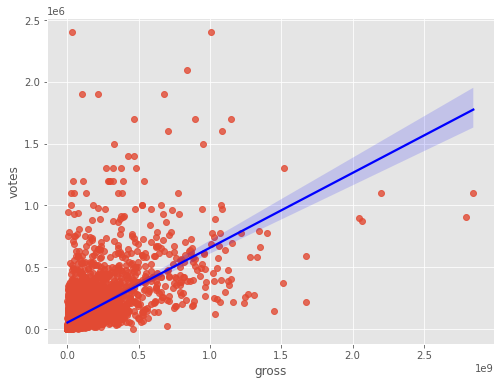

In [35]:
c= sns.regplot(x="gross", y="votes", data=df, line_kws={"color":"blue"})
c.figure.set_size_inches(8, 6)


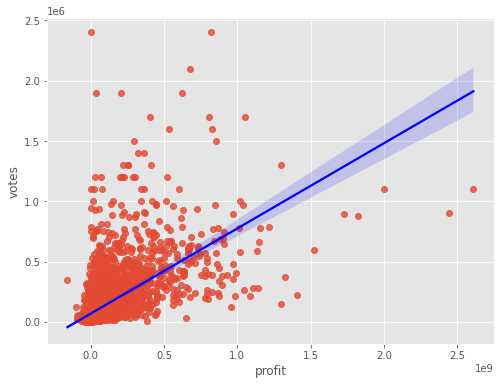

In [36]:
d= sns.regplot(x="profit", y="votes", data=df, line_kws={"color":"blue"})
d.figure.set_size_inches(8, 6)


***
## Q4: Which director produces the highest gross movies?


In [37]:
df['director'].value_counts()

Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
                     ..
Takao Okawara         1
Mark Tarlov           1
Michael Corrente      1
Gary Halvorson        1
Hu Guan               1
Name: director, Length: 2063, dtype: int64

In [38]:
df.groupby('director')[['gross','profit']].mean().sort_values('gross', ascending=False).head(5)

,gross,profit
director,,
Anthony Russo,1.368850e+09,1.138650e+09
Kyle Balda,1.097122e+09,1.020122e+09
Josh Cooley,1.073395e+09,8.733946e+08
Chris Buck,1.059909e+09,9.165756e+08
Joss Whedon,9.873567e+08,8.176901e+08


In [39]:
df.groupby('director')[['gross','profit']].mean().sort_values('profit', ascending=False).head(5)

,gross,profit
director,,
Anthony Russo,1.368850e+09,1.138650e+09
Kyle Balda,1.097122e+09,1.020122e+09
Chris Buck,1.059909e+09,9.165756e+08
Josh Cooley,1.073395e+09,8.733946e+08
Joss Whedon,9.873567e+08,8.176901e+08


#### The director producing the movie with the highest revenue and profit is Anthony Russo.

Let us find out what are the movies produced by Anthony Russo.

In [40]:
df.query('director == "Anthony Russo"').sort_values('profit', ascending=False).head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2441501328,87.274358
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,1727359754,84.328925
6846,Captain America: Civil War,PG-13,Action,"May 6, 2016 (United States)",7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000,1153337496,Marvel Studios,147.0,2016,903337496,78.323778


***
## Q5:  Which star actor is associated with higher popularity, gross and profit?


In [41]:
df['star'].describe()

count             5421
unique            1845
top       Nicolas Cage
freq                40
Name: star, dtype: object

In [42]:
df['star'].value_counts()

Nicolas Cage       40
Tom Hanks          38
Robert De Niro     38
Bruce Willis       34
Tom Cruise         33
                   ..
Robin Shou          1
Mira Sorvino        1
Djimon Hounsou      1
Stephen Fry         1
Zhi-zhong Huang     1
Name: star, Length: 1845, dtype: int64

In [43]:
df.groupby('star')[['votes','gross','profit']].sum().sort_values('profit',ascending=False).head(5)

,votes,gross,profit
star,,,
Robert Downey Jr.,8279700.0,11855937746,9557937746
Tom Hanks,12421000.0,9899944903,7607944903
Tom Cruise,8241200.0,9440309875,6903009875
Daniel Radcliffe,4506000.0,6971268037,5848268037
Will Smith,6332000.0,7947279234,5657179234


In [44]:
df.query('star == "Robert Downey Jr."').sort_values('gross',ascending=False).head(1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2441501328,87.274358


In [45]:
df.query('star == "Tom Hanks"').sort_values('gross',ascending=False).head(1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
7488,Toy Story 4,G,Animation,"June 21, 2019 (United States)",7.7,217000.0,Josh Cooley,John Lasseter,Tom Hanks,United States,200000000,1073394593,Pixar Animation Studios,100.0,2019,873394593,81.367523


In [46]:
df.query('star == "Tom Cruise"').sort_values('gross',ascending=False).head(1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
7253,Mission: Impossible - Fallout,PG-13,Action,"July 27, 2018 (United States)",7.7,303000.0,Christopher McQuarrie,Bruce Geller,Tom Cruise,United States,178000000,791657398,Paramount Pictures,147.0,2018,613657398,77.515526


#### Actors associated with higher gross and profit are Robert Downey Jr., Tom Hanks and Tom Cruise.

***
## Q6: Which year produced movies with highest grossing revenue?

In [47]:
year_gross = df.groupby('yearcorrect')[['yearcorrect','gross']].mean().sort_values('gross', ascending=False)
year_gross = year_gross.reset_index(drop=True)
year_gross.head(5)

,yearcorrect,gross
0,2020.0,2.592008e+08
1,2019.0,2.267999e+08
2,2017.0,1.969212e+08
3,2018.0,1.945072e+08
4,2016.0,1.711169e+08


Text(0.5, 1.0, 'Gross Revenue by Year')

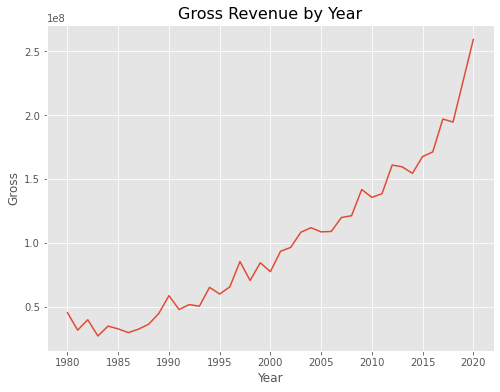

In [67]:
e= sns.lineplot(data=year_gross, x="yearcorrect", y="gross")
e.figure.set_size_inches(8, 6)

# Set label for x-axis
e.set_xlabel( "Year" , size = 12 )
  
# Set label for y-axis
e.set_ylabel( "Gross" , size = 12 )
  
# Set title for plot
e.set_title( "Gross Revenue by Year" , size = 16 )

In [49]:
df.sort_values('gross',ascending=False).head(1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2610246203,91.676168


#### 2020 produced movies with highest grossing revenue.

#### Avatar produced in 2009 has the highest grossing revenue.

***
## Q7: Which company has the most revenue and what is their most profitable film?


In [69]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum().sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [73]:
df.query('company == "Warner Bros."').sort_values('profit',ascending=False).head(1)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,profit,profit_margin
5845,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,"July 15, 2011 (United States)",8.1,790000.0,David Yates,Steve Kloves,Daniel Radcliffe,United Kingdom,125000000,1342321665,Warner Bros.,130.0,2011,1217321665,90.687776


#### Warner Bros. is the company with the highest revenue and its most profitable film was Harry Potter and the Deathly Hallows: Part 2

***
## Q8: What are the 3 best rated movies?

In [81]:
df['score'].describe()

count    5421.000000
mean        6.392455
std         0.962730
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [92]:
# Looking at the top 15 highest rated movies

df[["name","score"]].sort_values('score', ascending = False)[:15]


,name,score
2443,The Shawshank Redemption,9.3
5243,The Dark Knight,9.0
2247,Schindler's List,8.9
2444,Pulp Fiction,8.9
4245,The Lord of the Rings: The Return of the King,8.9
5643,Inception,8.8
2445,Forrest Gump,8.8
3444,Fight Club,8.8
3845,The Lord of the Rings: The Fellowship of the Ring,8.8
3443,The Matrix,8.7


***
### Conclusions:


#### Q1: Does a higher budget results in higher revenue and profit?
WE confirm that we have correlation between budget and gross and between budget and profit. In general, movies with a higher budget results in a higher profit.


#### Q2: What is the most profitable genre?
Family, Animation and Action are the most profitable genres


#### Q3: Which genres are associated with high popularity?
Mistery, Family and Action are the most popular genres.


#### Q4: Which director produces the highest gross movies?
The director producing the movie with the highest revenue and profit is Anthony Russo, directing Marvel hero movies.


#### Q5: Which star actor is associated with higher popularity, gross and profit?
Actors associated with higher gross and profit are Robert Downey Jr., Tom Hanks and Tom Cruise.


#### Q6: Which year produced movies with highest grossing revenue?
2020 produced movies with highest grossing revenue.
Avatar produced in 2009 has the highest grossing revenue


#### Q7: Which company has the most revenue and what is their most profitable film?
Warner Bros. is the company with the highest revenue and its most profitable film was Harry Potter and the Deathly Hallows: Part 2


#### Q8: What are the 3 best rated movies?
The best rated films are: The Shawshank Redemption, The Dark Knight and Schindler's List.


### Limitations of Dataset:
- too much data without budget information has been erased

I hope that you enjoyed 😁